In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

In [89]:
filename="/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-01.parquet"

In [38]:
df=pd.read_parquet("/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-01.parquet")

In [ ]:
# df=pd.read_parquet("/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-01.parquet")

# df['duration']= df.lpep_dropoff_datetime-df.lpep_pickup_datetime

# df.duration=df["duration"].apply(lambda td: td.total_seconds()/60)

# df=df[(df.duration >=1 ) & (df.duration <=60 )]

# categorical=['PULocationID','DOLocationID']

# df[categorical]=df[categorical].astype('str')




In [39]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00


In [40]:
df.shape

(68211, 20)

In [41]:
df.trip_type.nunique()

2

In [42]:
df.shape

(68211, 20)

In [43]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [44]:
df['duration']= df.lpep_dropoff_datetime-df.lpep_pickup_datetime

In [45]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58


In [46]:
df.duration=df["duration"].apply(lambda td: td.total_seconds()/60)

In [47]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,5.966667


In [48]:
# df=df[df.trip_type==2]

In [49]:
df.duration.describe()

count    68211.000000
mean        18.097271
std         74.925631
min          0.000000
25%          7.216667
50%         11.400000
75%         17.483333
max       1439.883333
Name: duration, dtype: float64

In [51]:
df=df[(df.duration >=1 ) & (df.duration <=60 )]

In [53]:
df.DOLocationID.nunique()

248

In [54]:
df.PULocationID.nunique()

219

In [52]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,5.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,...,0.0,0.00,0.0,None,1.0,16.70,NaN,NaN,NaN,13.000000
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,...,0.0,0.00,0.0,None,1.0,5.41,NaN,NaN,NaN,8.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,...,0.0,3.51,0.0,None,1.0,21.04,NaN,NaN,NaN,16.000000
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,...,0.0,3.20,0.0,None,1.0,19.18,NaN,NaN,NaN,18.000000


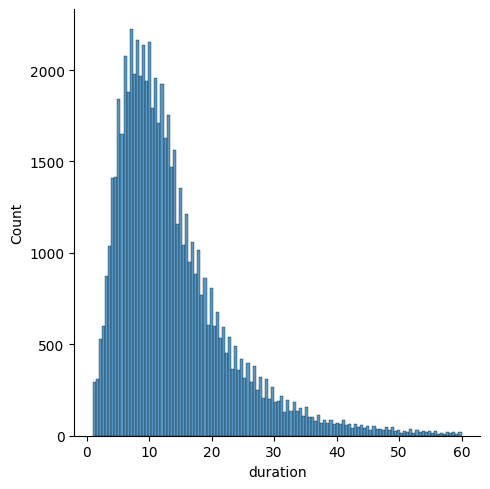

In [55]:
sns.displot(df.duration)

In [56]:
categorical=['PULocationID','DOLocationID'] # variables which we will be using 
numerical=['trip_distance']

In [59]:
df[categorical]=df[categorical].astype('str')

In [60]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,5.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,...,0.0,0.00,0.0,None,1.0,16.70,NaN,NaN,NaN,13.000000
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,...,0.0,0.00,0.0,None,1.0,5.41,NaN,NaN,NaN,8.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,...,0.0,3.51,0.0,None,1.0,21.04,NaN,NaN,NaN,16.000000
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,...,0.0,3.20,0.0,None,1.0,19.18,NaN,NaN,NaN,18.000000


In [63]:
df[categorical + numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': '166', 'DOLocationID': '143', 'trip_distance': 2.58},
 {'PULocationID': '24', 'DOLocationID': '43', 'trip_distance': 1.81},
 {'PULocationID': '223', 'DOLocationID': '179', 'trip_distance': 0.0},
 {'PULocationID': '41', 'DOLocationID': '238', 'trip_distance': 1.3},
 {'PULocationID': '41', 'DOLocationID': '74', 'trip_distance': 1.1},
 {'PULocationID': '41', 'DOLocationID': '262', 'trip_distance': 2.78},
 {'PULocationID': '181', 'DOLocationID': '45', 'trip_distance': 3.8},
 {'PULocationID': '24', 'DOLocationID': '75', 'trip_distance': 1.88},
 {'PULocationID': '41', 'DOLocationID': '166', 'trip_distance': 1.11},
 {'PULocationID': '24', 'DOLocationID': '140', 'trip_distance': 4.22}]

In [64]:
train_dicts=df[categorical + numerical].to_dict(orient='records')

In [66]:
dv = DictVectorizer()
X_train=dv.fit_transform(train_dicts)

In [74]:
X_train

<65946x468 sparse matrix of type '<class 'numpy.float64'>'
	with 197838 stored elements in Compressed Sparse Row format>

In [71]:
# dv.feature_names_

In [72]:
dv?

Type:        DictVectorizer
String form: DictVectorizer()
File:        ~/mlops_zoomcamp/mlop/lib/python3.12/site-packages/sklearn/feature_extraction/_dict_vectorizer.py
Docstring:  
Transforms lists of feature-value mappings to vectors.

This transformer turns lists of mappings (dict-like objects) of feature
names to feature values into Numpy arrays or scipy.sparse matrices for use
with scikit-learn estimators.

When feature values are strings, this transformer will do a binary one-hot
(aka one-of-K) coding: one boolean-valued feature is constructed for each
of the possible string values that the feature can take on. For instance,
a feature "f" that can take on the values "ham" and "spam" will become two
features in the output, one signifying "f=ham", the other "f=spam".

If a feature value is a sequence or set of strings, this transformer
will iterate over the values and will count the occurrences of each string
value.

However, note that this transformer will only do a binary one-hot

In [78]:
target = 'duration'
y_train=df[target].values

In [79]:
y_train

array([11.01666667,  6.76666667,  6.33333333, ..., 16.        ,
       18.        , 16.        ])

In [80]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [81]:
y_predict=lr.predict(X_train)

/tmp/ipykernel_34503/1823862663.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,label='actual')
/tmp/ipykernel_34503/1823862663.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict,label="prediction")


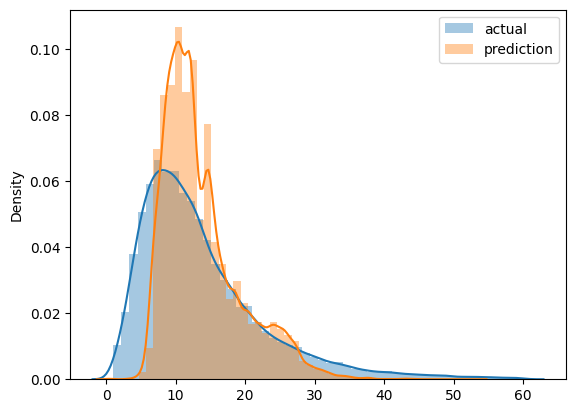

In [85]:
sns.distplot(y_train,label='actual')
sns.distplot(y_predict,label="prediction")
plt.legend()


In [87]:
mean_squared_error(y_train,y_predict,squared=False)

/home/kaustubh/mlops_zoomcamp/mlop/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.0590084265594495

In [97]:
def read_dataframe(filename):
    df=pd.read_parquet(filename)

    df['duration']= df.lpep_dropoff_datetime-df.lpep_pickup_datetime

    df.duration=df["duration"].apply(lambda td: td.total_seconds()/60)

    df=df[(df.duration >=1 ) & (df.duration <=60 )]

    categorical=['PULocationID','DOLocationID']

    df[categorical]=df[categorical].astype('str')

    return df

In [98]:
df_train = read_dataframe(filename)
df_val = read_dataframe("/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-02.parquet")

In [108]:
df_train['PU_DO']= df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO']= df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [109]:
categorical= ['PU_DO']     #['PULocationID','DOLocationID'] # variables which we will be using 
numerical=['trip_distance']

dv = DictVectorizer()

train_dicts=df_train[categorical + numerical].to_dict(orient='records')
X_train=dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val=dv.transform(val_dicts)


In [110]:
target = 'duration'
y_train=df_train[target].values
y_val=df_val[target].values

In [122]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_predict=lr.predict(X_val)

mean_squared_error(y_val,y_predict,squared=False)

/home/kaustubh/mlops_zoomcamp/mlop/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6.037457085676871

In [123]:
import os

In [120]:
pwd

'/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp'

In [119]:
os.chdir('../')

In [124]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv,lr) , f_out)

In [112]:
lr = Lasso()
lr.fit(X_train,y_train)

y_predict=lr.predict(X_val)

mean_squared_error(y_val,y_predict,squared=False)

/home/kaustubh/mlops_zoomcamp/mlop/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.321996657918817

In [113]:
lr = Ridge()
lr.fit(X_train,y_train)

y_predict=lr.predict(X_val)

mean_squared_error(y_val,y_predict,squared=False)

/home/kaustubh/mlops_zoomcamp/mlop/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6.010295053321533